In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

import xgboost as xgb

from imblearn.over_sampling import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

# Analysis of Credit Card fraud dataset

This dataset is  an interesting trainning dataset to understand the concept of imbalanced dataset.

## A look at the data

The number of entries is quite important which will help us having relevant results. <br>
V1 to V28 are variables comming from a PCA technique to anonymize the data. 

In [35]:
data = pd.read_csv('creditcard.csv')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


The main difficulty of this dataset is in theextremely underepresented fraud label. <br>
Which is an often encountered issue wthin real dataset for detection.

<AxesSubplot:>

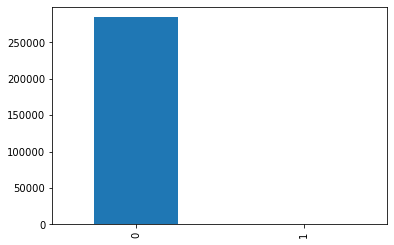

In [36]:
data['Class'].value_counts().plot(kind='bar')

To resolve the issue we use the SMOTE technique which is often better than simply randomly oversample

In [37]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

sampler = SMOTE()

X_res, y_res =sampler.fit_resample(X, y)

scaler = MinMaxScaler()

X_res = scaler.fit_transform(X_res)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

## XGBoost

Here we use XGBoost to have a quick and precise ML algo working on the dataset

In [42]:
model = xgb.XGBClassifier(use_label_encoder=False)

model.fit(X_train, y_train, verbose=1)

[16:23:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [44]:
predictions =  model.predict(X_test) > 0.5

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93775
           1       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



## Conclusion

It works pretty well with a precision of 1 and a F1 score of 1. <br>
We have to be careful on that result, a good continuation would be a test on another real dataset of the same kind keeping this already trained model.